In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn import metrics, datasets, preprocessing, model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, plot_roc_curve
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()

In [2]:
df=pd.read_excel("Iris.xls")
df["iris"]=le.fit_transform(df["iris"])
x=df.loc[:,["sepal length","sepal width","petal length","petal width"]]
y=df["iris"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
df

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
def fit_predict(x_train,y_train,x_test):
    ydf=pd.concat([x_train,y_train], axis=1)
    küme=[]
    for i in range(0,y_train.values.max()+1):
        küme.append(ydf[ydf.iloc[:,(len(ydf.columns)-1):len(ydf.columns)].values ==i]) 
        küme[i]=küme[i].drop(ydf.iloc[:,(len(ydf.columns)-1):len(ydf.columns)],axis=1)
    mean_küme=[]
    for i in range(0,y_train.values.max()+1):
        for k in range(0,len(x_train.columns)):
            mean_küme.append(küme[i].iloc[:,k:k+1].mean().values)
    mean_küme=np.array(mean_küme)
    mean_küme=mean_küme.reshape((y_train.values.max()+1,len(x_train.columns)))
    mean_küme=pd.DataFrame(mean_küme)
    oran_küme=[]
    for i in range(0,y_train.values.max()+1):
        for d in range(0,len(mean_küme.columns)):
            for j in range(0,len(mean_küme.columns)):
                if mean_küme.iloc[i:i+1,d:d+1].values!=mean_küme.iloc[i:i+1,j:j+1].values:
                    oran_küme.append(abs(mean_küme.iloc[i:i+1,d:d+1].values/mean_küme.iloc[i:i+1,j:j+1].values))
    oran_küme=np.array(oran_küme)
    oran_küme=oran_küme.reshape(((y_train.values.max()+1)*len(mean_küme.columns),len(mean_küme.columns)-1))
    hesap=[]
    for i in range(0,x_test[x_test.columns[0]].count()):
        for d in range(0,len(x_test.columns)):
            for j in range(0,len(x_test.columns)):
                if d!=j:
                    if x_test.iloc[i,j]==0:
                        hesap.append(abs(x_test.iloc[i,d]/1))
                    else:
                        hesap.append(abs(x_test.iloc[i,d]/x_test.iloc[i,j]))
    hesap=np.array(hesap)
    hesap=hesap.reshape(x_test[x_test.columns[0]].count()*len(x_test.columns),(len(x_test.columns)-1))
    d=0
    sonuc=[]
    i=0
    while i <(x_test[x_test.columns[0]].count()*len(x_test.columns)): 
        if i > len(x_test.columns)-1:
            d=i
            d=d%4
            for x in range(0,y_train.max()+1):
                for k in range(0,len(x_test.columns)-1):
                    sonuc.append(abs(hesap[i,k]-oran_küme[d+(x*len(x_test.columns)),k]))
        else:
            for x in range(0,y_train.max()+1):
                for k in range(0,len(x_test.columns)-1):
                    sonuc.append(abs(hesap[i,k]-oran_küme[i+(x*len(x_test.columns)),k]))
        i=i+1
    sonuc=np.array(sonuc)
    sayac=0
    result=[]
    i=0
    while i < sonuc.size:
        for x in range(len(x_test.columns)-1):
            sayac=sonuc[i]+sayac
            i=i+1
        result.append(sayac)
        sayac=0
    result=np.array(result)
    result=result.reshape((x_test[x_test.columns[0]].count()*len(x_test.columns)),y_train.max()+1)
    hesap=[]
    sayac=0
    i=0
    upper=0
    upper1=0
    while i < result.size:
        sayac=0
        if i%(len(x_test.columns)*(y_train.max()+1))==0 and i>0:
            upper=upper+len(x_test.columns)
        if upper1==(y_train.max()+1):
            upper1=0
        for k in range(0,len(x_test.columns)):
            sayac=result[k+upper,upper1]+sayac
            i=i+1
        hesap.append(sayac)
        upper1=upper1+1
    sayac=999999999
    index=0
    sonuc=[]
    i=0
    while i<len(hesap):
        for x in range(y_train.max()+1):
            if hesap[i]<sayac:
                sayac=hesap[i]
                index=i
            i=i+1
        sonuc.append(index%(y_train.max()+1))
        index=0
        sayac=9999999999
    sonuc=pd.DataFrame(data=sonuc)
    return sonuc

In [4]:
tahmin=fit_predict(x_train,y_train,x_test)

Text(0.5, 1.0, 'puanlama algoritma Classification')

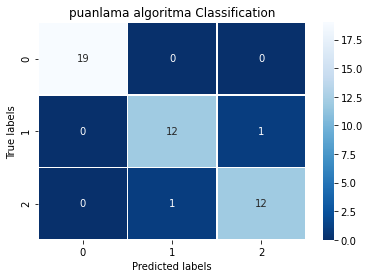

In [5]:
cm = confusion_matrix(y_test,tahmin)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('puanlama algoritma Classification')

In [11]:
df=pd.read_csv("heart.csv")
df=df.rename(columns={"age":"yaş","sex":"cinsiyet","trestbps":"tansiyon","chol":"kolestrol","fbs":"A.kanşekeri","restecg":"EKG","thalach":"MaxNabız","exang":"Anjin","oldpeak":"STdep","slope":"STegimi","ca":"florosopi","thal":"thal","target":"KalpHast"})
x=df.loc[:,["yaş","cinsiyet","cp","tansiyon","kolestrol","A.kanşekeri","EKG","MaxNabız","Anjin","STdep","STegimi","florosopi","thal"]]
y=df["KalpHast"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [12]:
tk=fit_predict(x_train,y_train,x_test)

Text(0.5, 1.0, 'puanlama algoritma Classification')

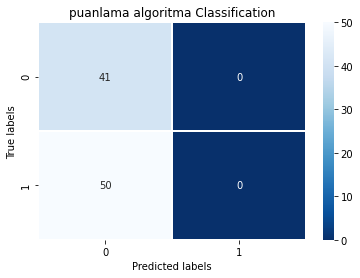

In [13]:
cm = confusion_matrix(y_test,tk)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, linewidths=0.5, cmap = 'Blues_r', fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('puanlama algoritma Classification')